Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


Load data : mobile.csv

In [2]:
df = pd.read_csv('./Datasets/mobile.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Look inside the dataset by finding information.

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Draw scatter plot of purchased and not_purchased value with respect to Age and EstimatedSalary.

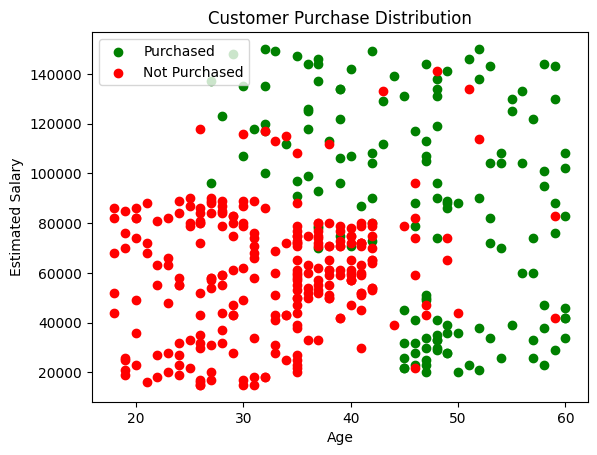

In [4]:
purchased = df[df['Purchased'] == 1]
not_purchased = df[df['Purchased'] == 0]

plt.scatter(purchased['Age'], purchased['EstimatedSalary'], color='green', label='Purchased')
plt.scatter(not_purchased['Age'], not_purchased['EstimatedSalary'], color='red', label='Not Purchased')

plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.title('Customer Purchase Distribution')
plt.legend()
plt.show()

Do Feature engineering (normalize the Age and EstimatedSalary columns)

In [5]:
X = df[['Age', 'EstimatedSalary']]
y=df['Purchased']

scaler =StandardScaler()
X_scaled = scaler.fit_transform(X)

Split the dataset into train and test data

In [6]:
X_train, X_test, y_train, y_test =train_test_split(X_scaled, y, test_size=0.25, random_state=0)

Build the kNN model with k=5,k=3,k=7.

In [7]:
knn3 =KNeighborsClassifier(n_neighbors=3)
knn3.fit(X_train, y_train)

y_train_pred =knn3.predict(X_train)
y_test_pred= knn3.predict(X_test)

print("K =3")
print("Train Accuracy:", accuracy_score(y_train,y_train_pred))
print("Test Accuracy:", accuracy_score(y_test,y_test_pred))

K =3
Train Accuracy: 0.9133333333333333
Test Accuracy: 0.93


Evaluate model performance on train and test sets with different value of k.

In [8]:
knn5 =KNeighborsClassifier(n_neighbors=5)
knn5.fit(X_train, y_train)

y_train_preds =knn5.predict(X_train)
y_test_preds= knn5.predict(X_test)

print("K =5")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))

K =5
Train Accuracy: 0.9133333333333333
Test Accuracy: 0.93


In [9]:
knn7 =KNeighborsClassifier(n_neighbors=7)
knn7.fit(X_train, y_train)
y_train_pred = knn7.predict(X_train)
y_train_pred =knn7.predict(X_train)

print("K = 7")
print("Train Accuracy:" , accuracy_score(y_train, y_train_pred))
print("Test Accuracy:" , accuracy_score(y_test, y_test_pred))


K = 7
Train Accuracy: 0.9133333333333333
Test Accuracy: 0.93


Create Binary Class SVM model

In [10]:
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions


Reading input from csv file (iris.csv)

In [11]:
df = pd.read_csv("./Datasets/iris.csv")
df.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Do Feature Engineering

In [12]:
X = iris[['sepal_length', 'sepal_width']].values


NameError: name 'iris' is not defined

In [40]:
iris['v_nv'] = iris['species'].apply(lambda x: 0 if x == 'versicolor' else 1)
y = iris['v_nv'].values


In [41]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [42]:
svm_binary = SVC(kernel='linear')
svm_binary.fit(X, y)


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


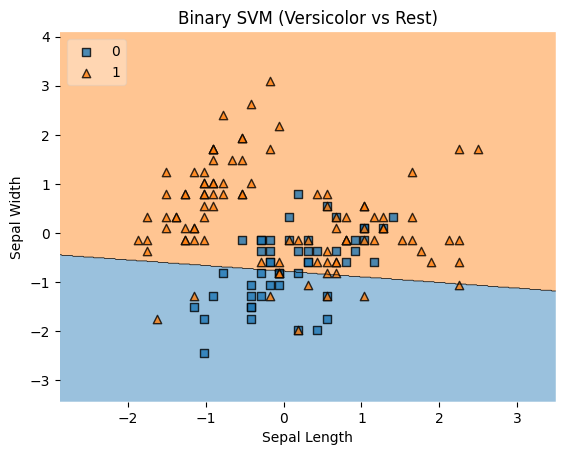

In [43]:
plot_decision_regions(X, y, clf=svm_binary, legend=2)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Binary SVM (Versicolor vs Rest)")
plt.show()


In [44]:
iris['species_encoded'] = iris['species'].map({
    'setosa': 0,
    'versicolor': 1,
    'virginica': 2
})


In [45]:
X = iris[['sepal_length', 'sepal_width']].values
y = iris['species_encoded'].values

X = scaler.fit_transform(X)


In [46]:
svm_multi = SVC(kernel='linear', decision_function_shape='ovr')
svm_multi.fit(X, y)


,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'linear'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


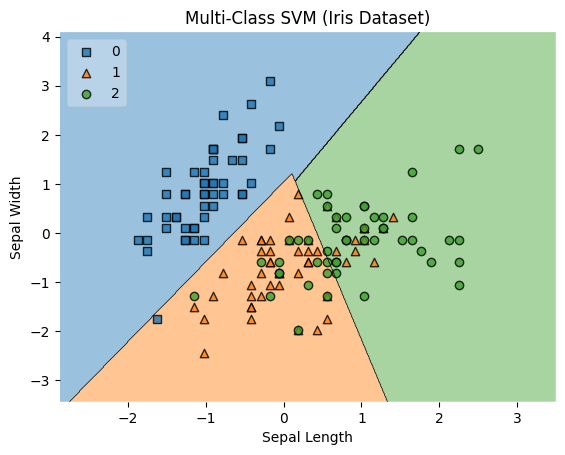

In [47]:
plot_decision_regions(X, y, clf=svm_multi, legend=2)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Multi-Class SVM (Iris Dataset)")
plt.show()


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#reading input from csv file
iris_data = pd.read_csv('./Datasets/iris.csv')
iris_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [22]:
iris_data['Species'].unique()


array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [23]:
# createing new colum 'v_nv',to distaangish versicolor  special from rest
# the below lambda function return 0 for 'versioncolor' species and return 1 for rest 
v_nv_fn = lambda x: 0 if x == 'versicolor' else 1
#new color add into data frame
iris_data['v_nv'] = iris_data['Species'].apply(v_nv_fn)

iris_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,v_nv
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1
146,6.3,2.5,5.0,1.9,virginica,1
147,6.5,3.0,5.2,2.0,virginica,1
148,6.2,3.4,5.4,2.3,virginica,1


In [33]:
print(iris_data.columns)

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width', 'Species',
       'v_nv'],
      dtype='object')


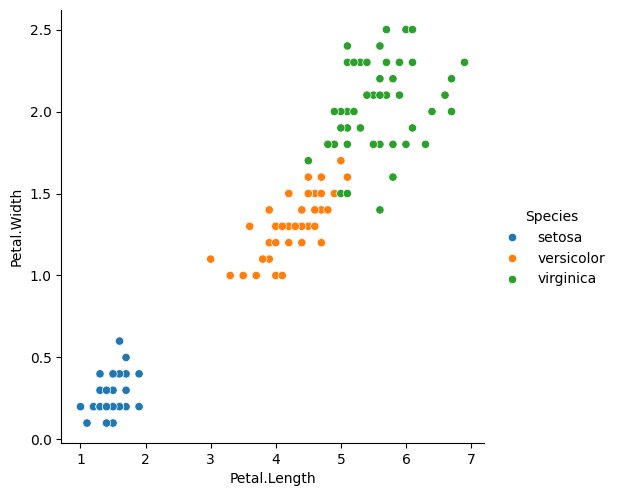

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    data=iris_data,
    x_vars=["Petal.Length"], 
    y_vars=["Petal.Width"],   # Correct column name
    hue="Species",
    height=5
)

plt.show()


In [52]:
from sklearn.svm import SVC

x=iris_data[['Petal.Length', 'Petal.Width']]
y=iris_data['v_nv']

model = SVC()
model.fit(x,y)

model.score(x,y)

0.9533333333333334

In [53]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


c:\Users\rajsi\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


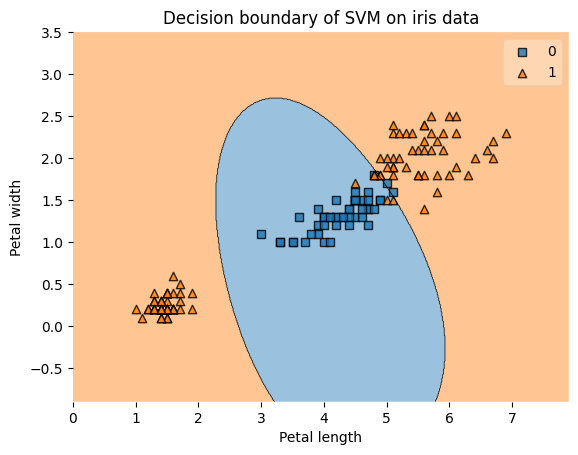

In [54]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import numpy as np

features = np.array(x)
target = np.array(y)
plot_decision_regions(features, target, clf=model)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title('Decision boundary of SVM on iris data')
plt.show()


In [55]:
y_pred =model.predict(x)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Feature Engineering -Encoding

you can encodingg the species  column witrh numerical values .And 

In [56]:
from sklearn.preprocessing import StandardScaler
le =LabelEncoder()
iris_data['Species_encoded'] = le.fit_transform(iris_data['Species'])
iris_data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,v_nv,Species_encoded
0,5.1,3.5,1.4,0.2,setosa,1,0
1,4.9,3.0,1.4,0.2,setosa,1,0
2,4.7,3.2,1.3,0.2,setosa,1,0
3,4.6,3.1,1.5,0.2,setosa,1,0
4,5.0,3.6,1.4,0.2,setosa,1,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica,1,2
146,6.3,2.5,5.0,1.9,virginica,1,2
147,6.5,3.0,5.2,2.0,virginica,1,2
148,6.2,3.4,5.4,2.3,virginica,1,2


In [57]:
X = iris_data[['Petal.Length', 'Petal.Width']]
Y = iris_data['Species']
model = SVC()
model.fit(X,Y)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",False
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",None
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


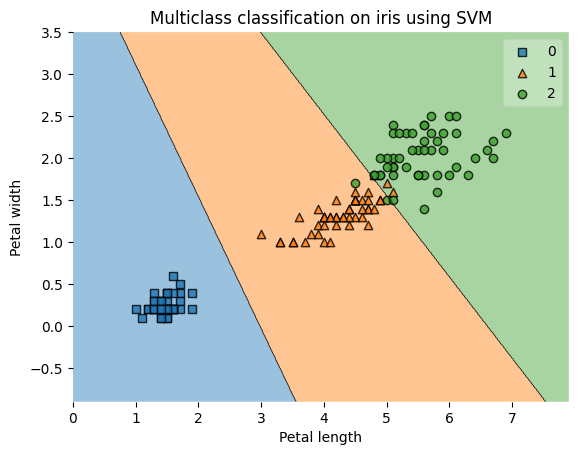

In [62]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_iris

# Load dataset
iris = load_iris()

# Take ONLY 2 features (mandatory)
X = iris.data[:, [2, 3]]   # Petal length & Petal width
y = iris.target            # Already integer labels

# Train model
model = SVC(kernel='linear')
model.fit(X, y)

# Plot
plot_decision_regions(X, y, clf=model)

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.title("Multiclass classification on iris using SVM")
plt.show()
